In [ ]:
# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator. More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

## Perform API Calls

In [7]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oudtshoorn
Processing Record 2 of Set 1 | san jeronimo
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | ucluelet
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | taltal
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | waingapu
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | svetlyy
Processing Record 21 of Set 1 | muros
Processing Record 22 

Processing Record 36 of Set 4 | moba
Processing Record 37 of Set 4 | birao
Processing Record 38 of Set 4 | rindal
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | marinette
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | hwange
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | karaul
City not found. Skipping...
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | roald
Processing Record 49 of Set 4 | malanje
Processing Record 0 of Set 5 | kegayli
City not found. Skipping...
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | bardiyah
Processing Record 3 of Set 5 | marcona
City not found. Skipping...
Processing Record 4 of Set 5 | santa cruz
Processing Record 5 of Set 5 | horizontina
Processing Record 6 of Set 5 | kununurra
Processing Record 7 of Set 5 | klaksvik
Processing Record 8

City not found. Skipping...
Processing Record 26 of Set 8 | kayerkan
Processing Record 27 of Set 8 | yeppoon
Processing Record 28 of Set 8 | altay
Processing Record 29 of Set 8 | saint-francois
Processing Record 30 of Set 8 | marzuq
Processing Record 31 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 32 of Set 8 | seoul
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | moss point
Processing Record 36 of Set 8 | griffith
Processing Record 37 of Set 8 | lupiro
Processing Record 38 of Set 8 | casambalangan
Processing Record 39 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 8 | ossora
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | nyurba
Processing Record 43 of Set 8 | chalus
Processing Record 44 of Set 8 | mawlaik
Processing Record 45 of Set 8 | muzhi
Processing Record 46 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 8 | hofn
Pr

Processing Record 13 of Set 12 | chilca
Processing Record 14 of Set 12 | lakatoro
Processing Record 15 of Set 12 | lorengau
Processing Record 16 of Set 12 | elko
Processing Record 17 of Set 12 | verkhnedneprovskiy
Processing Record 18 of Set 12 | vetapalem
Processing Record 19 of Set 12 | afzalgarh
Processing Record 20 of Set 12 | narsaq
Processing Record 21 of Set 12 | aflu
City not found. Skipping...
Processing Record 22 of Set 12 | aporawan
City not found. Skipping...
Processing Record 23 of Set 12 | ayolas
Processing Record 24 of Set 12 | hegang
Processing Record 25 of Set 12 | hami
Processing Record 26 of Set 12 | yulara
Processing Record 27 of Set 12 | ye
City not found. Skipping...
Processing Record 28 of Set 12 | poronaysk
Processing Record 29 of Set 12 | jizan
Processing Record 30 of Set 12 | cumberland
Processing Record 31 of Set 12 | freeport
Processing Record 32 of Set 12 | bose
Processing Record 33 of Set 12 | rio pardo
Processing Record 34 of Set 12 | graz
Processing Reco

In [18]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [19]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oudtshoorn,-33.59,22.20,59.00,93,90,5.82,ZA,1605424003
1,san jeronimo,-11.95,-75.28,48.67,72,96,0.60,PE,1605424003
2,bethel,41.37,-73.41,33.01,92,1,2.57,US,1605423919
3,bredasdorp,-34.53,20.04,62.60,59,99,4.70,ZA,1605423923
4,ucluelet,48.93,-125.55,45.00,91,100,1.01,CA,1605423732


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,17.929108,17.834021,57.942308,73.365385,50.998252,8.416958,1.605424e+09
std,33.646753,90.160605,25.056816,21.025155,41.089944,6.311407,7.665905e+01
min,-54.800000,-175.200000,-25.510000,8.000000,0.000000,0.180000,1.605424e+09
25%,-9.695000,-65.055000,42.025000,61.750000,1.000000,3.360000,1.605424e+09
50%,18.820000,20.650000,64.510000,79.000000,59.500000,6.870000,1.605424e+09
75%,46.567500,100.340000,77.370000,89.000000,90.000000,11.515000,1.605424e+09
max,78.220000,179.320000,111.200000,100.000000,100.000000,46.080000,1.605424e+09


In [21]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oudtshoorn,-33.59,22.20,59.00,93,90,5.82,ZA,1605424003
1,san jeronimo,-11.95,-75.28,48.67,72,96,0.60,PE,1605424003
2,bethel,41.37,-73.41,33.01,92,1,2.57,US,1605423919
3,bredasdorp,-34.53,20.04,62.60,59,99,4.70,ZA,1605423923
4,ucluelet,48.93,-125.55,45.00,91,100,1.01,CA,1605423732


In [23]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

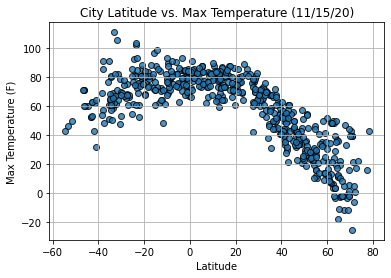

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

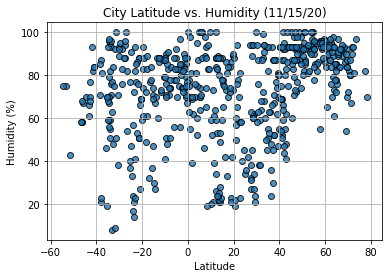

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

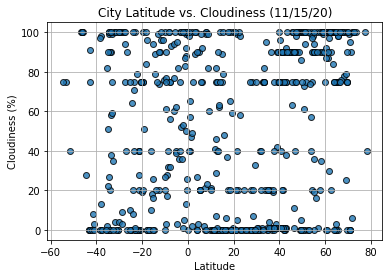

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

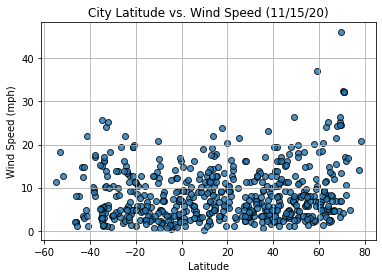

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [28]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.7700482252945069


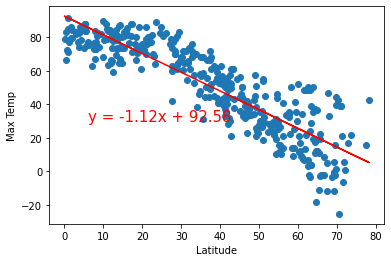

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.21646746506919656


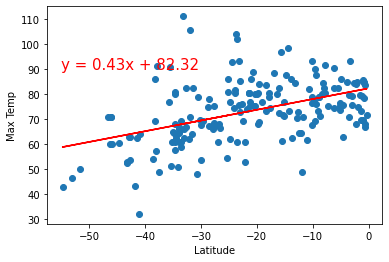

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1641431799047446


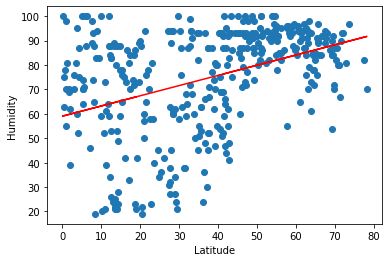

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.027350043140387414


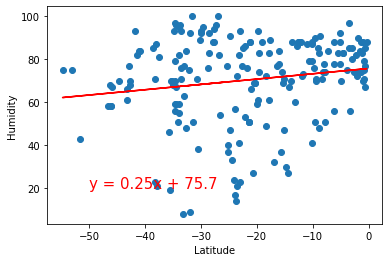

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11341765228514325


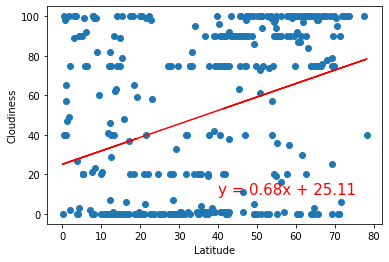

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.01693216607799246


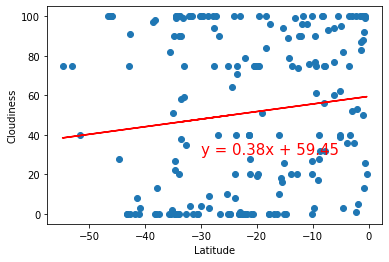

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03331996425038726


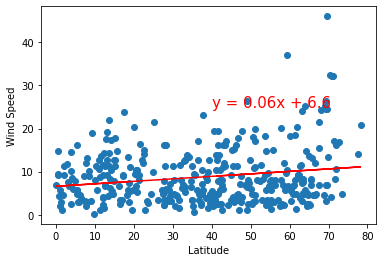

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.03580233449369686


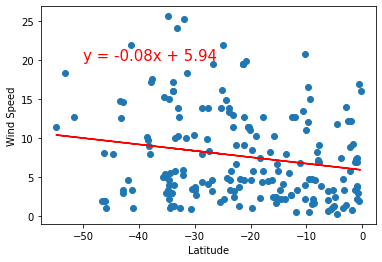

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.